# Lesson 6

## Retrieving data from OpenStreetMap

In [1]:
import osmnx

PLACE_NAME = 'Kamppi, Helsinki, Finland'
graph = osmnx.graph_from_place(PLACE_NAME)

C:\Users\PC\miniconda3\envs\autogis\lib\site-packages\osmnx\projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

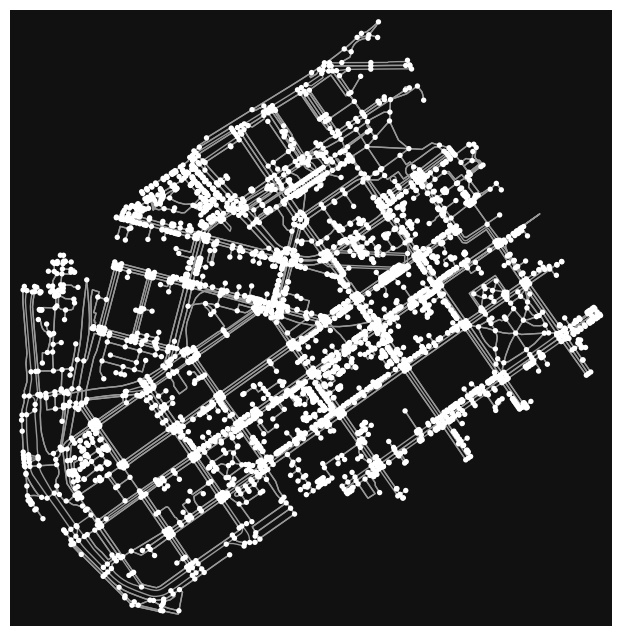

In [3]:
figure, ax = osmnx.plot_graph(graph)

### Convert a graph to GeoDataFrame

In [4]:
# Convert MultiDiGraph to GeoDataFrame
nodes, edges = osmnx.graph_to_gdfs(graph)

In [5]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
25216594,60.164794,24.921057,5,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163665,24.921028,4,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,4,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,3,NaN,NaN,POINT (24.92453 60.16111)
25238937,60.160860,24.925861,3,NaN,NaN,POINT (24.92586 60.16086)


In [6]:
edges.head()

osmid  oneway lanes            name   highway  \
u        v          key                                                      
25216594 1372425721 0     23717777    True     2   Porkkalankatu   primary   
         1372425714 0     23856784    True     2  Mechelininkatu   primary   
25238874 336192701  0     29977177    True     3  Mechelininkatu   primary   
         1519889266 0    930820886    True     1    Itämerenkatu  tertiary   
25238883 568147264  0     58077048    True     4  Mechelininkatu   primary   

                        maxspeed reversed  length  \
u        v          key                             
25216594 1372425721 0         40    False  10.404   
         1372425714 0         40    False  40.885   
25238874 336192701  0         40    False   5.843   
         1519889266 0         30    False  10.879   
25238883 568147264  0         40    False  15.388   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 336192701  0    LINESTRING (24.92103 60.16366, 24.92104 60.16361)   
         1519889266 0    LINESTRING (24.92103 60.16366, 24.92083 60.16366)   
25238883 568147264  0    LINESTRING (24.92144 60.16345, 24.92140 60.16359)   

                        junction tunnel access bridge service width  
u        v          key                                              
25216594 1372425721 0        NaN    NaN    NaN    NaN     NaN   NaN  
         1372425714 0        NaN    NaN    NaN    NaN     NaN   NaN  
25238874 336192701  0        NaN    NaN    NaN    NaN     NaN   NaN  
         1519889266 0        NaN    NaN    NaN    NaN     NaN   NaN  
25238883 568147264  0        NaN    NaN    NaN    NaN     NaN   NaN

In [8]:
# Get place boundary related to the place name as a gdf
area = osmnx.geocode_to_gdf(PLACE_NAME)

In [9]:
type(area)

geopandas.geodataframe.GeoDataFrame

In [10]:
area.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...",60.172075,60.160469,24.943453,24.920643,297690581,relation,184714,60.168535,24.930494,"Kamppi, Southern major district, Helsinki, Hel...",boundary,administrative,0.760313


<AxesSubplot: >

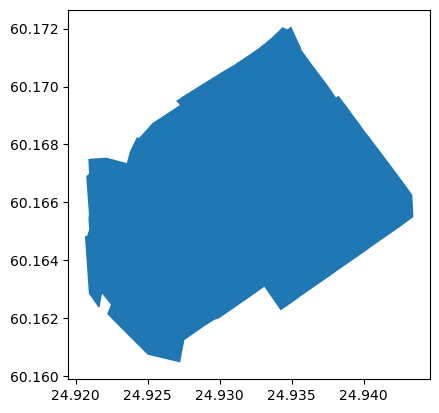

In [11]:
area.plot()

In [16]:
# Download otehr data related to the place
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building":True},
)

In [17]:
len(buildings)

448

In [18]:
buildings.head()

ele                                           geometry  \
element_type osmid                                                              
way          8035238   NaN  POLYGON ((24.93563 60.17045, 24.93557 60.17054...   
             8042297   NaN  POLYGON ((24.92938 60.16795, 24.92933 60.16797...   
             14797170  NaN  POLYGON ((24.92427 60.16648, 24.92427 60.16650...   
             14797171  NaN  POLYGON ((24.92390 60.16729, 24.92391 60.16731...   
             14797172  NaN  POLYGON ((24.92647 60.16689, 24.92648 60.16689...   

                      amenity          operator wheelchair  source access  \
element_type osmid                                                          
way          8035238      NaN               NaN        NaN     NaN    NaN   
             8042297      NaN               NaN        NaN     NaN    NaN   
             14797170     NaN  City of Helsinki        NaN  survey    NaN   
             14797171     NaN               NaN        NaN  survey    NaN   
             14797172     NaN               NaN        NaN  survey    NaN   

                      addr:housenumber      addr:street addr:unit  ...  \
element_type osmid                                                 ...   
way          8035238             22-24  Mannerheimintie       NaN  ...   
             8042297                 2   Runeberginkatu       NaN  ...   
             14797170               10  Lapinlahdenkatu       NaN  ...   
             14797171              NaN              NaN       NaN  ...   
             14797172                2       Lapinrinne       NaN  ...   

                      lippakioski wikimedia_commons addr:floor covered area  \
element_type osmid                                                            
way          8035238          NaN               NaN        NaN     NaN  NaN   
             8042297          NaN               NaN        NaN     NaN  NaN   
             14797170         NaN               NaN        NaN     NaN  NaN   
             14797171         NaN               NaN        NaN     NaN  NaN   
             14797172         NaN               NaN        NaN     NaN  NaN   

                      leisure ways type electrified nohousenumber  
element_type osmid                                                 
way          8035238      NaN  NaN  NaN         NaN           NaN  
             8042297      NaN  NaN  NaN         NaN           NaN  
             14797170     NaN  NaN  NaN         NaN           NaN  
             14797171     NaN  NaN  NaN         NaN           NaN  
             14797172     NaN  NaN  NaN         NaN           NaN  

[5 rows x 114 columns]

In [19]:
buildings.columns 

Index(['ele', 'geometry', 'amenity', 'operator', 'wheelchair', 'source',
       'access', 'addr:housenumber', 'addr:street', 'addr:unit',
       ...
       'lippakioski', 'wikimedia_commons', 'addr:floor', 'covered', 'area',
       'leisure', 'ways', 'type', 'electrified', 'nohousenumber'],
      dtype='object', length=114)

In [22]:
# POI download
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {'amenity': "restaurant"}
)
len(restaurants)

175

In [23]:
# Available columns
restaurants.columns.values 

array(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'cuisine', 'diet:halal', 'diet:kosher',
       'name', 'payment:credit_cards', 'payment:debit_cards', 'phone',
       'website', 'wheelchair', 'geometry', 'email', 'facebook',
       'opening_hours', 'short_name', 'start_date', 'toilets:wheelchair',
       'delivery:covid19', 'opening_hours:covid19', 'takeaway:covid19',
       'diet:vegetarian', 'name:fi', 'name:zh', 'payment:cash',
       'diet:vegan', 'contact:phone', 'contact:website', 'source',
       'outdoor_seating', 'addr:housename', 'level', 'address',
       'access:covid19', 'drive_through:covid19', 'takeaway', 'delivery',
       'url', 'lunch:menu', 'note', 'reservation', 'room',
       'contact:facebook', 'indoor_seating', 'opening_hours:brunch',
       'toilets', 'capacity', 'smoking', 'access:dog', 'operator', 'shop',
       'alt_name', 'contact:email', 'established', 'description',
       'diet:non-vegetarian', 'nam

In [25]:
# Extracting revelant information
interesting_columns = [
    "name",
    "opening_hours",
    "addr:city",
    "addr:country",
    "addr:housenumber",
    "addr:postcode",
    "addr:street"
]

#Print only selected columns
restaurants[interesting_columns].head(10)

name  \
element_type osmid                                 
node         60062502                     Kabuki   
             62965963    Restaurant & Bar Fusion   
             76617692               Johan Ludvig   
             76624339                    Shinobi   
             76624351                     Pueblo   
             89074039                Papa Albert   
             151006260           Ravintola China   
             151006483  Tony's deli + Street Bar   
             151006932                Haru Sushi   
             151007074                      Koto   

                                                            opening_hours  \
element_type osmid                                                          
node         60062502                                                 NaN   
             62965963                  Mo-Th 11-22; Fr-Sa 11-02; Su 12-20   
             76617692                                                 NaN   
             76624339                                                 NaN   
             76624351                                                 NaN   
             89074039   Mo-Th 10:00-14:00, 17:30-22:00; Fr 11:00-23:00...   
             151006260       Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off   
             151006483                                                NaN   
             151006932  Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00   
             151007074                                                NaN   

                       addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                             
node         60062502   Helsinki           FI               12         00180   
             62965963        NaN          NaN              NaN           NaN   
             76617692   Helsinki           FI              NaN           NaN   
             76624339   Helsinki           FI               38         00120   
             76624351   Helsinki           FI              NaN           NaN   
             89074039   Helsinki           FI               30         00120   
             151006260  Helsinki           FI               25         00100   
             151006483  Helsinki           FI                7         00120   
             151006932  Helsinki           FI               30         00120   
             151007074  Helsinki           FI               22         00120   

                            addr:street  
element_type osmid                       
node         60062502   Lapinlahdenkatu  
             62965963               NaN  
             76617692               NaN  
             76624339      Albertinkatu  
             76624351       Eerikinkatu  
             89074039      Albertinkatu  
             151006260        Annankatu  
             151006483        Bulevardi  
             151006932    Fredrikinkatu  
             151007074    Lönnrotinkatu

In [26]:
# Get parks info
parks = osmnx.geometries_from_place(
    PLACE_NAME,
    {"leisure": "park",
     "landuse": "grass",
    },
)

In [27]:
parks.head()

geometry  \
element_type osmid                                                           
node         9577568989                          POINT (24.92915 60.16411)   
way          8042256     POLYGON ((24.93566 60.17132, 24.93566 60.17130...   
             8042613     POLYGON ((24.93701 60.16947, 24.93627 60.16919...   
             15218362    POLYGON ((24.92330 60.16499, 24.92323 60.16500...   
             15218739    POLYGON ((24.92741 60.16575, 24.92741 60.16574...   

                        access  source addr:city leisure                name  \
element_type osmid                                                             
node         9577568989    NaN     NaN       NaN    park      Kirveen puisto   
way          8042256       NaN     NaN       NaN    park                 NaN   
             8042613       NaN     NaN       NaN    park      Simonpuistikko   
             15218362      NaN  survey       NaN    park  Työmiehenpuistikko   
             15218739      NaN     NaN       NaN    park         Lastenlehto   

                                                                     nodes  \
element_type osmid                                                           
node         9577568989                                                NaN   
way          8042256     [292719496, 1001543836, 1037987967, 1001544060...   
             8042613     [552965718, 293390264, 295056669, 256264975, 1...   
             15218362    [144181223, 150532964, 150532958, 150532966, 1...   
             15218739    [1876856069, 1876856056, 1876856052, 187685606...   

                                    name:fi        name:sv  \
element_type osmid                                           
node         9577568989                 NaN            NaN   
way          8042256                    NaN            NaN   
             8042613         Simonpuistikko  Simonsskvären   
             15218362    Työmiehenpuistikko  Arbetarparken   
             15218739           Lastenlehto    Barnslunden   

                        hoitoluokitus_viheralue   wikidata       wikipedia  \
element_type osmid                                                           
node         9577568989                     NaN        NaN             NaN   
way          8042256                        NaN        NaN             NaN   
             8042613                        NaN        NaN             NaN   
             15218362                        A2        NaN             NaN   
             15218739                        A2  Q18660505  fi:Lastenlehto   

                        landuse alt_name loc_name  
element_type osmid                                 
node         9577568989     NaN      NaN      NaN  
way          8042256        NaN      NaN      NaN  
             8042613        NaN      NaN      NaN  
             15218362       NaN      NaN      NaN  
             15218739       NaN      NaN      NaN

<AxesSubplot: >

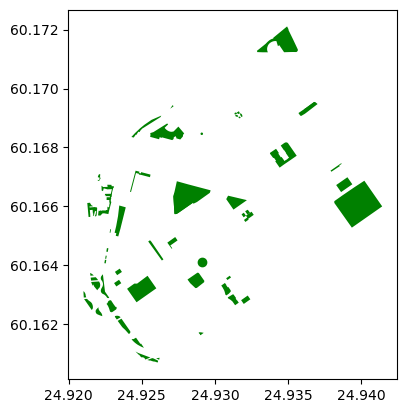

In [28]:
parks.plot(color="green")

### Ploting the data on a map

<AxesSubplot: >

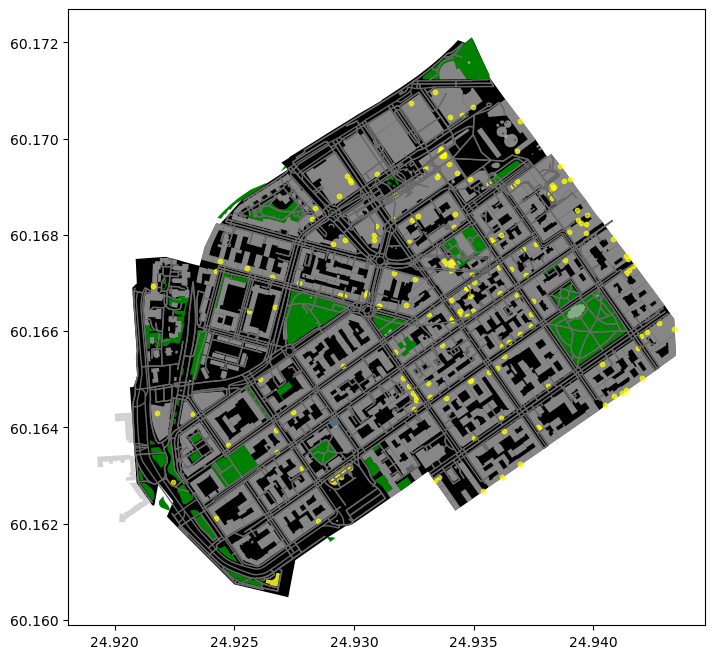

In [32]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

#Plot parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges (line roads)
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10)

## Network analysis

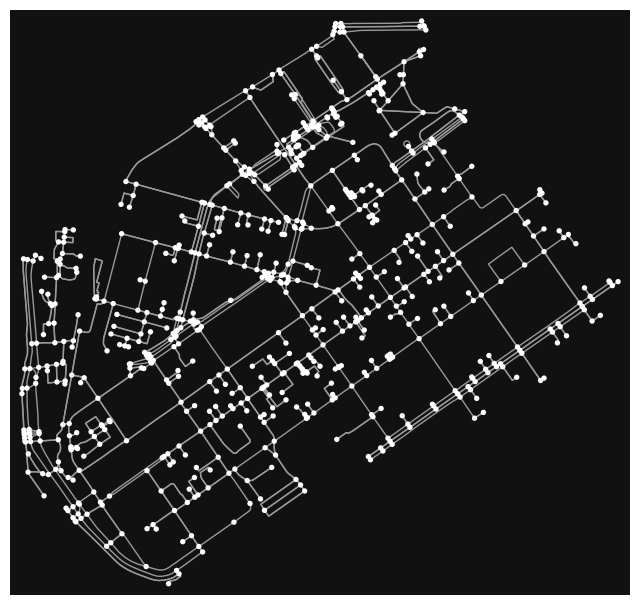

In [2]:
# Ibtain a routable network
import osmnx

PLACE_NAME = "Kamppi, Helsinki, Finland"
graph = osmnx.graph_from_place(
    PLACE_NAME,
    network_type="bike"
)
figure, ax = osmnx.plot_graph(graph)

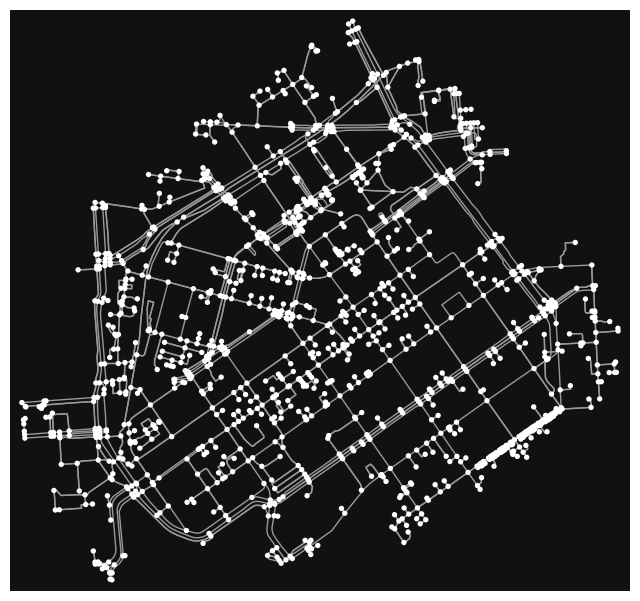

In [15]:
# Get the area of interest polygon
place_polygon = osmnx.geocode_to_gdf(PLACE_NAME)

# Re-project the polygon to a local projected CRS (sdo that the CRS unit is in meters)
place_polygon = place_polygon.to_crs("EPSG:3067")

# Buffer of 200 meters, to acount for possible fastest routes using roads outside the desired area
place_polygon["geometry"] = place_polygon.buffer(200)

# Re-project the polygon back to WGS84 (required by OSMnx)
place_polygon = place_polygon.to_crs("EPSG:4326")

# Retrieve the network graph
graph = osmnx.graph_from_polygon(
    place_polygon.at[0, "geometry"],
    network_type="bike"
)
fig, ax = osmnx.plot_graph(graph)

### Data overview

In [11]:
# Retrieve only edges from the graph
edges = osmnx.graph_to_gdfs(graph, nodes=False, edges=True)
edges.head()

osmid  oneway  \
u          v          key                                                    
25216594   1372425721 0                                   23717777    True   
           1372425714 0                                   23856784    True   
1372425721 25290781   0                                   29191566   False   
           60070671   0          [930820929, 930820930, 654270815]   False   
1372425714 25238874   0    [78537378, 8169098, 29081876, 78537375]    True   

                            lanes            name   highway maxspeed reversed  \
u          v          key                                                       
25216594   1372425721 0         2   Porkkalankatu   primary       40    False   
           1372425714 0         2  Mechelininkatu   primary       40    False   
1372425721 25290781   0       NaN             NaN  cycleway      NaN     True   
           60070671   0       NaN             NaN  cycleway      NaN    False   
1372425714 25238874   0    [3, 2]  Mechelininkatu   primary       40    False   

                            length  \
u          v          key            
25216594   1372425721 0     10.404   
           1372425714 0     40.885   
1372425721 25290781   0    228.587   
           60070671   0     41.006   
1372425714 25238874   0     85.540   

                                                                    geometry  \
u          v          key                                                      
25216594   1372425721 0    LINESTRING (384631.322 6671580.071, 384620.884...   
           1372425714 0    LINESTRING (384631.322 6671580.071, 384624.750...   
1372425721 25290781   0    LINESTRING (384620.884 6671579.965, 384621.184...   
           60070671   0    LINESTRING (384620.884 6671579.965, 384620.720...   
1372425714 25238874   0    LINESTRING (384624.179 6671539.986, 384623.768...   

                          junction bridge tunnel access service width  
u          v          key                                              
25216594   1372425721 0        NaN    NaN    NaN    NaN     NaN   NaN  
           1372425714 0        NaN    NaN    NaN    NaN     NaN   NaN  
1372425721 25290781   0        NaN    NaN    NaN    NaN     NaN   NaN  
           60070671   0        NaN    NaN    NaN    NaN     NaN   NaN  
1372425714 25238874   0        NaN    NaN    NaN    NaN     NaN   NaN

In [8]:
# What tipe of streets types compose the data?
edges["highway"].value_counts()

service                      902
cycleway                     477
residential                  470
pedestrian                   396
tertiary                     217
primary                      167
secondary                    121
unclassified                  42
living_street                 16
[pedestrian, service]         14
[living_street, service]       6
[cycleway, residential]        6
[pedestrian, residential]      4
[cycleway, pedestrian]         2
tertiary_link                  2
[pedestrian, cycleway]         2
primary_link                   1
[service, unclassified]        1
Name: highway, dtype: int64

In [16]:
# Transform the graph to UTM
graph = osmnx.project_graph(graph)

# Extract reprojected nodes and edges
nodes, edges = osmnx.graph_to_gdfs(graph)

nodes.crs

<Derived Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Analysing network properties

In [17]:
# Calculate network statistics
osmnx.basic_stats(graph)

{'n': 1337,
 'm': 2846,
 'k_avg': 4.257292445774121,
 'edge_length_total': 92693.73999999987,
 'edge_length_avg': 32.56983134223467,
 'streets_per_node_avg': 2.631264023934181,
 'streets_per_node_counts': {0: 0, 1: 390, 2: 18, 3: 643, 4: 267, 5: 19},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2916978309648467,
  2: 0.013462976813762155,
  3: 0.4809274495138369,
  4: 0.19970082273747194,
  5: 0.014210919970082274},
 'intersection_count': 947,
 'street_length_total': 57926.19199999984,
 'street_segment_count': 1718,
 'street_length_avg': 33.71722467986021,
 'circuity_avg': 1.0399921266769074,
 'self_loop_proportion': 0.0017462165308498253}

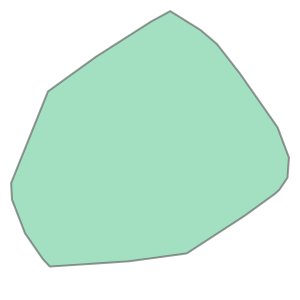

In [18]:
# Delineating the complex hull of the network
convex_hull = edges.unary_union.convex_hull
convex_hull

In [19]:
# Computing the area of the hull
stats = osmnx.basic_stats(graph, area=convex_hull.area)
stats

{'n': 1337,
 'm': 2846,
 'k_avg': 4.257292445774121,
 'edge_length_total': 92693.73999999987,
 'edge_length_avg': 32.56983134223467,
 'streets_per_node_avg': 2.631264023934181,
 'streets_per_node_counts': {0: 0, 1: 390, 2: 18, 3: 643, 4: 267, 5: 19},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2916978309648467,
  2: 0.013462976813762155,
  3: 0.4809274495138369,
  4: 0.19970082273747194,
  5: 0.014210919970082274},
 'intersection_count': 947,
 'street_length_total': 57926.19199999984,
 'street_segment_count': 1718,
 'street_length_avg': 33.71722467986021,
 'circuity_avg': 1.0399921266769074,
 'self_loop_proportion': 0.0017462165308498253,
 'node_density_km': 775.3255978826927,
 'intersection_density_km': 549.1648026887883,
 'edge_density_km': 53753.05114845383,
 'street_density_km': 33591.3683212173}

### Shortest path analysis

In [20]:
origin = (
    osmnx.geocode_to_gdf("Maria 01, Helsinki")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("ruttopuisto")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

In [21]:
# get the nearest node's ID
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
origin_node_id

319719983

In [22]:
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)
destination_node_id

1377208998

In [23]:
# Find the shortest path between origin and destination
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)
route

[319719983,
 1382316822,
 1382316829,
 1382316852,
 5464887863,
 1382320461,
 5154747161,
 1378064352,
 1372461709,
 1372441203,
 3205236795,
 3205236793,
 8244768393,
 60278325,
 56115897,
 60072524,
 7699019923,
 7699019916,
 7699019908,
 7699019903,
 267117319,
 1897461604,
 724233143,
 724233128,
 267117317,
 846597945,
 846597947,
 2037356632,
 1547012339,
 569742461,
 1372441189,
 4524927399,
 298372061,
 7702074840,
 7702074833,
 60170471,
 8856704555,
 3227176325,
 7676757030,
 8856704573,
 7676756995,
 8856704588,
 1377211668,
 60170470,
 8874925445,
 3228706311,
 1377211669,
 1377209035,
 1377208998]

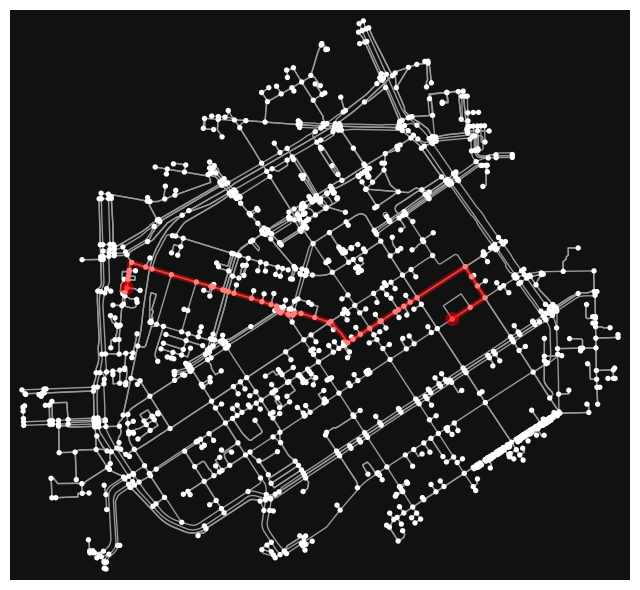

In [24]:
# Plot the shortest path
fig, ax = osmnx.plot_graph_route(graph, route)

### Save the shortest path to disk

In [25]:
# Get the nodes along the shortest path
route_nodes = nodes.loc[route]
route_nodes

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
319719983,6.671816e+06,384706.296089,3,24.922273,60.166932,NaN,NaN,POINT (384706.296 6671815.989)
1382316822,6.671839e+06,384709.579017,4,24.922319,60.167142,NaN,NaN,POINT (384709.579 6671839.311)
1382316829,6.671850e+06,384711.044607,3,24.922339,60.167236,NaN,NaN,POINT (384711.045 6671849.707)
1382316852,6.671861e+06,384712.504583,3,24.922359,60.167338,NaN,NaN,POINT (384712.505 6671860.984)
5464887863,6.671865e+06,384713.220293,3,24.922370,60.167377,NaN,NaN,POINT (384713.220 6671865.374)
1382320461,6.671887e+06,384719.671826,3,24.922473,60.167575,NaN,NaN,POINT (384719.672 6671887.215)
5154747161,6.671874e+06,384758.946564,3,24.923188,60.167471,NaN,NaN,POINT (384758.947 6671874.411)
1378064352,6.671869e+06,384776.322613,3,24.923504,60.167428,NaN,NaN,POINT (384776.323 6671869.117)
1372461709,6.671853e+06,384830.142058,3,24.924482,60.167300,NaN,NaN,POINT (384830.142 6671853.149)


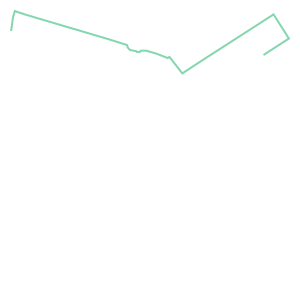

In [26]:
import shapely.geometry

# Create a geometry for the shortest path
route_line = shapely.geometry.LineString(
    list(route_nodes.geometry.values)
)
route_line

In [27]:
# GeoDataFrame of the route and useful informations
import geopandas

route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom["length_m"] = route_geom.length

route_geom.head()

,geometry,osm_nodes,length_m
0,"LINESTRING (384706.296 6671815.989, 384709.579...","[319719983, 1382316822, 1382316829, 1382316852...",1342.967878


In [28]:
# Download buildings
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "building" : True
    }
).to_crs(edges.crs)

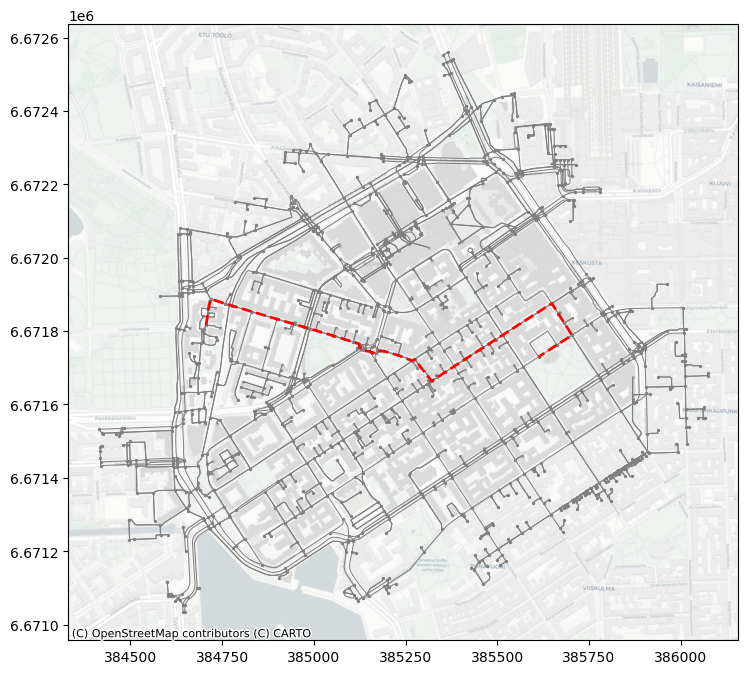

In [29]:
# Plot route over the previous street map, to see if everything is correct
import contextily
import matplotlib.pyplot

fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot edges and nodes
edges.plot(ax=ax, linewidth=0.75, color='gray')
nodes.plot(ax=ax, markersize=2, color='gray')

# Add buildings
ax = buildings.plot(ax=ax, facecolor='lightgray', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add basemap
contextily.add_basemap(ax, crs=buildings.crs, source=contextily.providers.CartoDB.Positron)

In [30]:
# Columns with invalid values
problematic_columns = [
    "osmid",
    "lanes",
    "name",
    "highway",
    "maxspeed",
    "reversed",
    "junction",
    "bridge",
    "tunnel",
    "access",
    "service",
    
]

#  convert selected columns to string format
edges[problematic_columns] = edges[problematic_columns].astype(str)

In [31]:
route_geom["osm_nodes"] = route_geom["osm_nodes"].astype(str)

In [33]:
import pathlib
MAIN_PATH = pathlib.Path().resolve()
SAVE_DIRECTORY = MAIN_PATH / "lesson-6"

In [34]:
# Save one layer after another
output_gpkg = SAVE_DIRECTORY / "OSM_Kamppi.gpkg"

edges.to_file(output_gpkg, layer="streets")
route_geom.to_file(output_gpkg, layer="route")
nodes.to_file(output_gpkg, layer="nodes")
buildings[['geometry', 'name', 'addr:street']].to_file(output_gpkg, layer="buildings")